### –ü—Ä–æ–≤–µ–¥–µ–Ω–∏–µ –ê–ê-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏: –ø–µ—Ä–∏–æ–¥ —Å 26.08.2025 –ø–æ 01.09.2025

In [ ]:
#–§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è 
def ab_split(id, salt='exp_mess_1', n_groups=5):
    test_id = str(id) + '-' + str(salt)
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
    test_id_final_int = int(test_id_digest, 16)
    return test_id_final_int % n_groups

In [6]:
import pandahouse
import swifter
import hashlib
import seaborn as sns
import scipy.stats
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [7]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20250920'
}

q = """
SELECT distinct user_id
FROM {db}.feed_actions 
WHERE toDate(time) >= '2025-08-26' and toDate(time) <= '2025-09-01' 
"""

# –í—ã—Ç–∞—â–∏–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
users_df = pandahouse.read_clickhouse(q, connection=connection)

# –°–¥–µ–ª–∞–ª–∏ –≥—Ä—É–ø–ø—ã
users_df['hash_group'] = users_df.user_id.swifter.apply(ab_split)

# –°–º–æ—Ç—Ä–∏–º –Ω–∞ —á–∏—Å–ª–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ
users_df.groupby('hash_group').user_id.nunique().reset_index()

Pandas Apply:   0%|          | 0/41997 [00:00<?, ?it/s]

hash_group  user_id
0           0     8588
1           1     8254
2           2     8397
3           3     8305
4           4     8453

In [8]:
#CTR –≤ –≥—Ä—É–ø–ø–∞—Ö 2 –∏ 3
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2025-08-26' and '2025-09-01'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

df.groupby('exp_group').count()

user_id  likes  views   ctr
exp_group                             
2             8362   8362   8362  8362
3             8425   8425   8425  8425

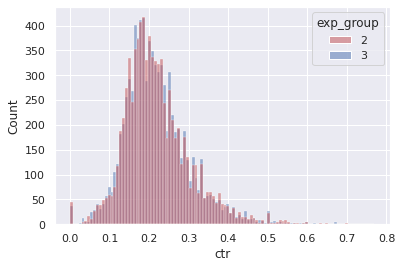

In [9]:
# –°–¥–µ–ª–∞–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –≤ seaborn –ø–æ–∫—Ä—É–ø–Ω–µ–µ
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

=== –ü–†–û–í–ï–†–ö–ê 1: –ú–Ω–æ–≥–æ–∫—Ä–∞—Ç–Ω—ã–π t-test ===
–î–æ–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (p < 0.05): 0.0451 (4.51%)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤: 451 –∏–∑ 10000


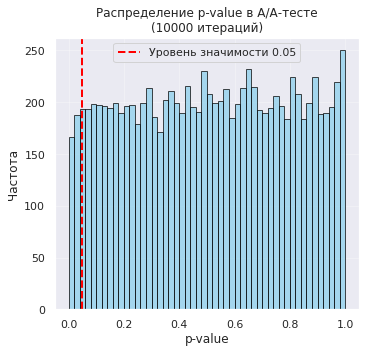

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print("=== –ü–†–û–í–ï–†–ö–ê 1: –ú–Ω–æ–≥–æ–∫—Ä–∞—Ç–Ω—ã–π t-test ===")
p_values = []
n_iterations = 10000
sample_size = 500

for i in range(n_iterations):
    # –ë–µ—Ä–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –±–µ–∑ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è –∏–∑ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    sample_2 = df[df.exp_group == 2].ctr.sample(n=sample_size, replace=False, random_state=i)
    sample_3 = df[df.exp_group == 3].ctr.sample(n=sample_size, replace=False, random_state=i+10000)
    
    # –ü—Ä–æ–≤–æ–¥–∏–º t-—Ç–µ—Å—Ç
    t_stat, p_value = stats.ttest_ind(sample_2, sample_3, equal_var=False)
    p_values.append(p_value)

significant_results = sum(np.array(p_values) < 0.05)
proportion_significant = significant_results / n_iterations

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(p_values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='–£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05')
plt.xlabel('p-value')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ p-value –≤ –ê/–ê-—Ç–µ—Å—Ç–µ\n(10000 –∏—Ç–µ—Ä–∞—Ü–∏–π)')
plt.legend()
plt.grid(alpha=0.3)

print(f"–î–æ–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (p < 0.05): {proportion_significant:.4f} ({proportion_significant*100:.2f}%)")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤: {significant_results} –∏–∑ {n_iterations}")

### –ü—Ä–æ–≤–µ–¥–µ–Ω–∏–µ –êB-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 1 –∏ 2: –ø–µ—Ä–∏–æ–¥ —Å 02.09.2025 –ø–æ 08.09.2025

In [11]:
#–°–æ–∑–¥–∞–ª–∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20250920'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20250920.feed_actions 
WHERE toDate(time) between '2025-09-02' and '2025-09-08'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

#T-—Ç–µ—Å—Ç

stats.ttest_ind(df[df.exp_group == 1].ctr,
                df[df.exp_group == 2].ctr,
                equal_var=False)

Ttest_indResult(statistic=0.4051491913112757, pvalue=0.685373331140751)

#### **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã**:
* t-—Ç–µ—Å—Ç: p-value = 0.685 ‚Üí –ø–æ —Ç–µ—Å—Ç—É –Ω–µ—Ç –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π
* t-—Ç–µ—Å—Ç –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ –∑–Ω–∞—á–∏–º, –ø–æ—Ç–æ–º—É —á—Ç–æ:

> * –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
> * –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –≤—ã–±—Ä–æ—Å–∞–º
> * CTR –æ–±—ã—á–Ω–æ –∏–º–µ–µ—Ç —Ç—è–∂–µ–ª—ã–µ —Ö–≤–æ—Å—Ç—ã –∏ –º–Ω–æ–≥–æ –Ω—É–ª–µ–π

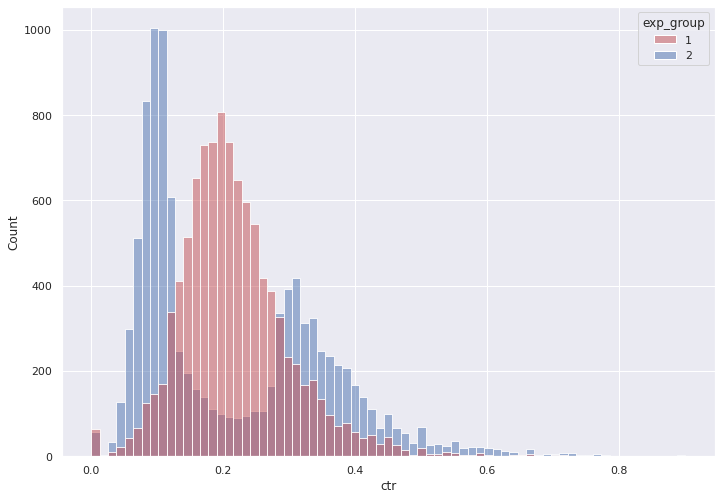

In [58]:
groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

#### **–í—ã–≤–æ–¥—ã**:
* —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ –≥—Ä—É–ø–ø–∞—Ö –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –Ω–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥
* —Ç–∞–∫–∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –≤–∏–¥ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ, —Å–æ–¥–µ—Ä–∂–∞—Ç –≤—ã–±—Ä–æ—Å—ã –∏ —à—É–º—ã, –ø–æ—ç—Ç–æ–º—É t-test, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –Ω–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–∏–º–æ–≥–æ —ç—Ñ—Ñ–µ–∫—Ç–∞. 
* –¥–ª—è —Ç–∞–∫–æ–≥–æ —Å–ª—É—á–∞—è —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç - –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏.

In [59]:
stats.mannwhitneyu(df[df.exp_group == 1].ctr, 
                   df[df.exp_group == 2].ctr,
                   alternative = 'two-sided')

MannwhitneyuResult(statistic=55189913.0, pvalue=4.632205841806026e-45)

#### **–ú–∞–Ω–Ω-–£–∏—Ç–Ω–∏ –∑–Ω–∞—á–∏–º, —Ç–∞–∫ –∫–∞–∫:**

* –ù–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç

* –†–∞–±–æ—Ç–∞–µ—Ç —Å —Ä–∞–Ω–≥–∞–º–∏, –∞ –Ω–µ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏

* –£—Å—Ç–æ–π—á–∏–≤ –∫ –≤—ã–±—Ä–æ—Å–∞–º –∏ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º

* –í–∏–¥–∏—Ç —Ä–∞–∑–Ω–∏—Ü—É –≤ "—Ñ–æ—Ä–º–µ" —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –≤ —Å—Ä–µ–¥–Ω–∏—Ö

<Axes: xlabel='ctr', ylabel='Count'>

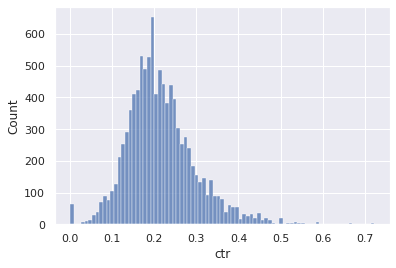

In [19]:
def get_smothed_ctr(user_likes, user_views, global_ctr, alpha):
    smothed_ctr = (user_likes + alpha * global_ctr) / (user_views + alpha)
    return smothed_ctr

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2025-09-02' and '2025-09-08'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

global_ctr_1 = df[df.exp_group == 1].likes.sum()/df[df.exp_group == 1].views.sum()
global_ctr_2 = df[df.exp_group == 2].likes.sum()/df[df.exp_group == 2].views.sum()

group1 = df[df.exp_group == 1].copy()
sns. histplot(group1.ctr, 
             kde = False)


<Axes: xlabel='smothed_ctr', ylabel='Count'>

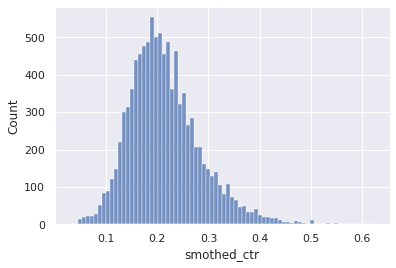

In [20]:
group1['smothed_ctr'] = df.apply(
    lambda x: get_smothed_ctr(x['likes'], x['views'], global_ctr_1, 5), axis=1)

sns.histplot(group1.smothed_ctr, 
             kde = False)

<Axes: xlabel='ctr', ylabel='Count'>

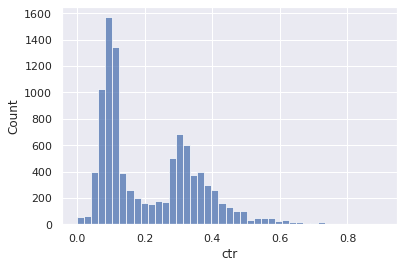

In [21]:
group2 = df[df.exp_group == 2].copy()
sns. histplot(group2.ctr, 
             kde = False)

<Axes: xlabel='smothed_ctr', ylabel='Count'>

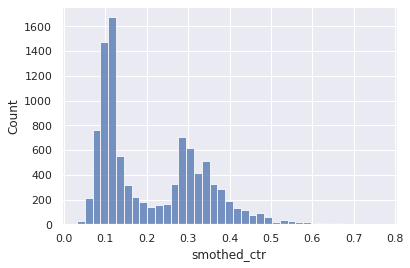

In [24]:
group2['smothed_ctr'] = df.apply(
    lambda x: get_smothed_ctr(x['likes'], x['views'], global_ctr_2, 5), axis=1)

sns.histplot(group2.smothed_ctr, 
             kde = False)

In [25]:
# T-—Ç–µ—Å—Ç –°—Ç—å—é–¥–µ–Ω—Ç–∞
t_stat, p_value = stats.ttest_ind(group1.smothed_ctr, 
                                 group2.smothed_ctr, 
                                 equal_var=False)
print(f"T-student result: statistic = {t_stat}, p-value={p_value}")

# –¢–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏
mw_stat, mw_pvalue = stats.mannwhitneyu(group1.smothed_ctr, 
                                       group2.smothed_ctr,
                                       alternative='two-sided')
print(f"Mann-Whitney result: statistic={mw_stat:}, p-value={mw_pvalue}")

T-student result: statistic = 1.9460491517027683, p-value=0.05166679015318526
Mann-Whitney result: statistic=55528353.0, p-value=2.396534039374286e-50


#### **–ü–æ—Å–ª–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –æ–±–∞ —Ç–µ—Å—Ç–∞ —Å—Ç–∞–ª–∏ –∑–Ω–∞—á–∏–º—ã–º–∏. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ:**

* –†–∞–∑–Ω–∏—Ü–∞ —Ä–µ–∞–ª—å–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏. –•–æ—Ç—å –∏ p-value –ø—Ä–∏ –°—Ç—å—é–¥–µ–Ω—Ç–∞ –Ω–µ —Ç–∞–∫–æ–π –º–∞–ª–µ–Ω—å–∫–∏–π, –∫–∞–∫ –ø—Ä–∏ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ - –æ–Ω —Å—Ç–∞–ª –≥–æ—Ä–∞–∑–¥–æ –º–µ–Ω—å—à–µ, –∏ –ø–æ—á—Ç–∏ –ø—Ä–æ–∫—Ä–∞—Å–∏–ª—Å—è.

* –ü—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ –≤ —à—É–º–µ –∏ –≤—ã–±—Ä–æ—Å–∞—Ö –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

* –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –ø–æ–º–æ–≥–ª–æ "–æ—á–∏—Å—Ç–∏—Ç—å" —Å–∏–≥–Ω–∞–ª

<Axes: ylabel='Count'>

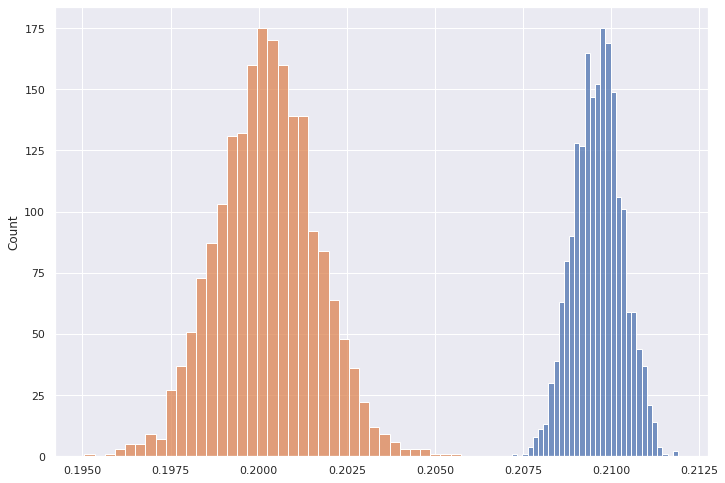

In [62]:
def bootstrap(likes1, views1, likes2, views2, n_bootstrap=2000):

    poisson_bootstraps1 = stats.poisson(1).rvs(
        (n_bootstrap, len(likes1))).astype(np.int64)

    poisson_bootstraps2 = stats.poisson(1).rvs(
            (n_bootstrap, len(likes2))).astype(np.int64)
    
    globalCTR1 = (poisson_bootstraps1*likes1).sum(axis=1)/(poisson_bootstraps1*views1).sum(axis=1)
    
    globalCTR2 = (poisson_bootstraps2*likes2).sum(axis=1)/(poisson_bootstraps2*views2).sum(axis=1)

    return globalCTR1, globalCTR2


q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2025-09-02' and '2025-09-08'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""


df = pandahouse.read_clickhouse(q, connection=connection)

likes1 = df[df.exp_group == 1].likes.to_numpy()
views1 = df[df.exp_group == 1].views.to_numpy()
likes2 = df[df.exp_group == 2].likes.to_numpy()
views2 = df[df.exp_group == 2].views.to_numpy()

ctr1, ctr2 = bootstrap(likes1, views1, likes2, views2)

sns.histplot(ctr1)
sns.histplot(ctr2)

<Axes: ylabel='Count'>

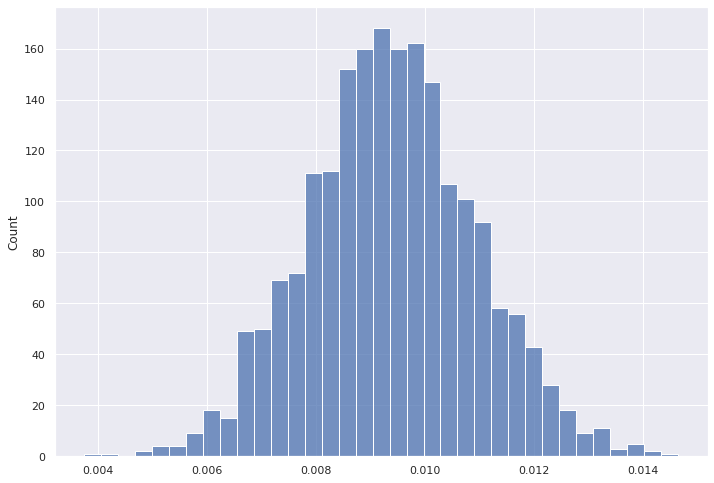

In [63]:
#–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –≥–ª–æ–±–∞–ª—å–Ω—ã–º–∏ CTR

sns.histplot(ctr1 - ctr2)

#### **–í—ã–≤–æ–¥—ã**:
* –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è - –∑–Ω–∞—á–∏—Ç, —Ä–∞–∑–ª–∏—á–∏—è —Ç–æ—á–Ω–æ –µ—Å—Ç—å.
* –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏ –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç –Ω–æ–ª—å.

In [64]:
q = """

SELECT exp_group, bucket,
    sum(likes)/sum(views) as bucket_ctr,
    quantileExact(0.9)(ctr) as ctr9
FROM (SELECT exp_group, 
        xxHash64(user_id)%50 as bucket,
        user_id,
        sum(action = 'like') as likes,
        sum(action = 'view') as views,
        likes/views as ctr
    FROM {db}.feed_actions 
    WHERE toDate(time) between '2025-09-02' and '2025-09-08'
        and exp_group in (1,2)
    GROUP BY exp_group, bucket, user_id)
GROUP BY exp_group, bucket
"""

df = pandahouse.read_clickhouse(q, connection=connection)

#—Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –≤–∏–¥–∏—Ç –æ—Ç–ª–∏—á–∏–µ
stats.mannwhitneyu(df[df.exp_group == 1].bucket_ctr, 
                   df[df.exp_group == 2].bucket_ctr, 
                   alternative = 'two-sided')

MannwhitneyuResult(statistic=1997.0, pvalue=2.6576427804010095e-07)

In [65]:
#–¢-—Ç–µ—Å—Ç –°—Ç—å—é–¥–µ–Ω—Ç–∞ —Ç–∞–∫–∂–µ –≤–∏–¥–∏—Ç –æ—Ç–ª–∏—á–∏–µ
stats.ttest_ind(df[df.exp_group == 1].bucket_ctr, 
                   df[df.exp_group == 2].bucket_ctr, 
                   equal_var = False)

Ttest_indResult(statistic=5.614819358149381, pvalue=4.592644937473873e-07)

#### **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã**:
–ë–∞–∫–µ—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏. 

<Axes: xlabel='bucket_ctr', ylabel='Count'>

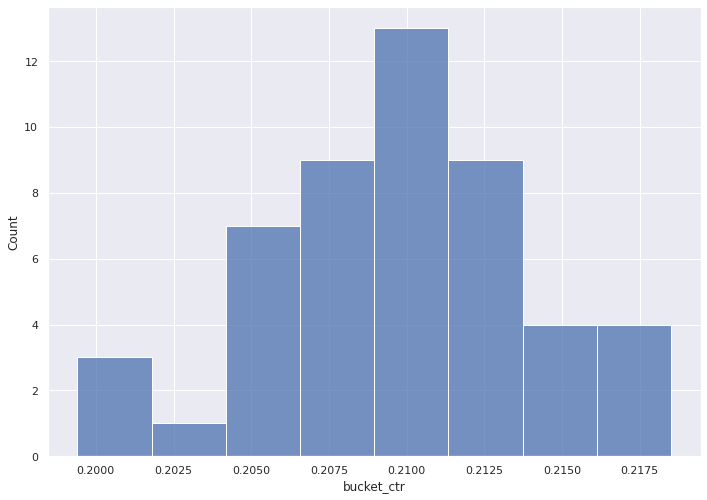

In [71]:
sns.histplot(df[df.exp_group == 1].bucket_ctr)

<Axes: xlabel='ctr9', ylabel='Count'>

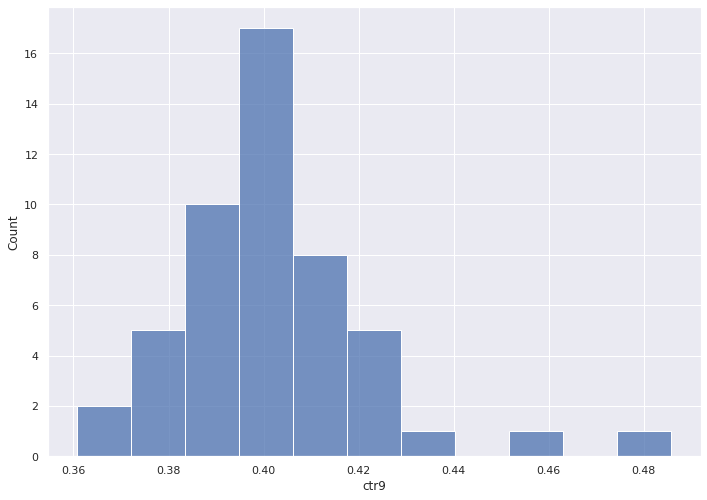

In [69]:
sns.histplot(df[df.exp_group == 2].ctr9)

## üîç –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

### –ü–æ—á–µ–º—É –∞–ª–≥–æ—Ä–∏—Ç–º —Å—Ç–∞–ª –ª—É—á—à–µ, –≤–æ–∑–º–æ–∂–Ω—ã–µ —Å—Ü–µ–Ω–∞—Ä–∏–∏.

> * **–ê–ª–≥–æ—Ä–∏—Ç–º —Å—Ç–∞–ª –ª—É—á—à–µ –ø–æ–¥–±–∏—Ä–∞—Ç—å —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–π –∫–æ–Ω—Ç–µ–Ω—Ç.**
> * **–¢–∞–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –≤–ø–æ–ª–Ω–µ –æ–∂–∏–¥–∞–µ–º–∞ –ø—Ä–∏ —É—Å–ø–µ—à–Ω–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏.**
> * **–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —á–∞—â–µ –ª–∞–π–∫–∞—é—Ç, –ø–æ—Ç–æ–º—É —á—Ç–æ –≤–∏–¥—è—Ç —Ç–æ, —á—Ç–æ –∏–º —Ä–µ–∞–ª—å–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ.**
> * **–ê–ª–≥–æ—Ä–∏—Ç–º –º–æ–∂–µ—Ç —Å–º–µ—Å—Ç–∏—Ç—å –±–∞–ª–∞–Ω—Å –≤ –ø–æ–ª—å–∑—É ¬´–≤–∏—Ä–∞–ª—å–Ω–æ–≥–æ¬ª –∫–æ–Ω—Ç–µ–Ω—Ç–∞.** 
> * **–õ–µ–Ω—Ç–∞ –º–æ–∂–µ—Ç —á–∞—â–µ –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ –ø–æ—Å—Ç—ã –∏–ª–∏ –∫–æ—Ä–æ—Ç–∫–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–æ—â–µ –ª–∞–π–∫–Ω—É—Ç—å.** 
> * **–í –∏—Ç–æ–≥–µ CTR —Ä–∞—Å—Ç—ë—Ç, –Ω–æ —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø—Ä–æ–≤–æ–¥—è—Ç –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–ª–∏ –≥–ª—É–±–∂–µ –≤–æ–≤–ª–µ–∫–∞—é—Ç—Å—è.**


## üìà –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

### üü¢ **–†–∞—Å–∫–∞—Ç—ã–≤–∞—Ç—å –Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞ –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π**

**–ù–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º (–≥—Ä—É–ø–ø–∞ 2) —Å—Ç–æ–∏—Ç —Ä–∞—Å–∫–∞—Ç—ã–≤–∞—Ç—å –Ω–∞ –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.
–û–∂–∏–¥–∞–µ—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ CTR.
–û–¥–Ω–∞–∫–æ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –º–æ–Ω–∏—Ç–æ—Ä–∏—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –≤–æ–≤–ª–µ—á–µ–Ω–Ω–æ—Å—Ç–∏ (—É–¥–µ—Ä–∂–∞–Ω–∏–µ, –≥–ª—É–±–∏–Ω—É –ø—Ä–æ—Å–º–æ—Ç—Ä–∞, –≤—Ä–µ–º—è –≤ –ª–µ–Ω—Ç–µ), —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ —Ä–æ—Å—Ç CTR –Ω–µ —Å–æ–ø—Ä–æ–≤–æ–∂–¥–∞–µ—Ç—Å—è –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–º–∏ —ç—Ñ—Ñ–µ–∫—Ç–∞–º–∏.**

In [87]:
ctr_control = df[df.exp_group.isin([0,1])].likes.sum() / df[df.exp_group.isin([0,1])].views.sum()
round(ctr_control, 2)

0.21